# K-Nearest Neighbors (KNN) From Scratch  
In this notebook, we implement the KNN algorithm without using scikit-learn.  
We will:  
- Generate a dataset  
- Implement KNN step-by-step  
- Evaluate the model  
- Visualize results


## What is KNN? 
KNN is a simple non-parametric algorithm that classifies a point based on the majority label among its K closest neighbors.

**Steps:**
1. Compute distances to all training points  
2. Pick the K nearest  
3. Majority vote → predicted class


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

plt.style.use("ggplot")


## 1. Create a Synthetic Dataset
We generate a simple 2D dataset to apply KNN on it.


In [2]:
np.random.seed(42)

# Generate 3 clusters
def make_blobs(centers, n_samples=80, std=1.0):
    X = []
    y = []
    for idx, center in enumerate(centers):
        points = np.random.randn(n_samples, 2) * std + center
        X.append(points)
        y += [idx] * n_samples
    return np.vstack(X), np.array(y)

centers = [(-5, -2), (0, 5), (6, 0)]
X, y = make_blobs(centers)


## 2. Visualize the Dataset


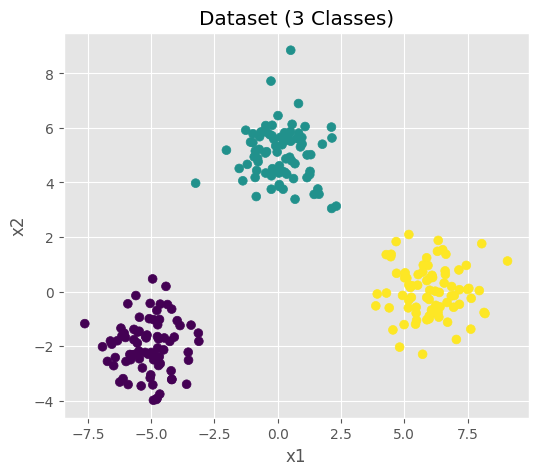

In [3]:
plt.figure(figsize=(6, 5))
plt.scatter(X[:,0], X[:,1], c=y, s=40)
plt.title("Dataset (3 Classes)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


## 3. Split into Train and Test Sets


In [4]:
perm = np.random.permutation(len(X))
split = int(0.75 * len(X))

train_idx = perm[:split]
test_idx = perm[split:]

X_train, y_train = X[train_idx], y[train_idx]
X_test, y_test = X[test_idx], y[test_idx]


## 4. Compute distance between the query point and all training samples

In [5]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))


In [6]:
def knn_single_point(X_train, y_train, q, k):
    # 1. Compute all distances
    distances = np.array([euclidean_distance(x, q) for x in X_train])
    
    # 2. Indexes of K nearest neighbors
    nn_idx = np.argsort(distances)[:k]
    
    # 3. Majority vote
    nn_labels = y_train[nn_idx]
    prediction = Counter(nn_labels).most_common(1)[0][0]
    
    return prediction


In [7]:
def knn_predict(X_train, y_train, X_query, k=5):
    return np.array([knn_single_point(X_train, y_train, q, k) for q in X_query])


## 5. Evaluate the Model

In [8]:
k = 5
y_pred = knn_predict(X_train, y_train, X_test, k=k)
accuracy = np.mean(y_pred == y_test)

print(f"Accuracy (k={k}): {accuracy:.3f}")


Accuracy (k=5): 1.000


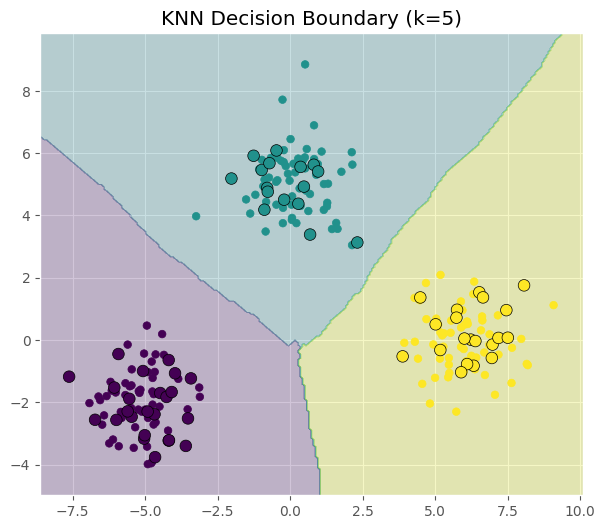

In [9]:
# Grid for decision boundary
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-1, X[:,0].max()+1, 250),
    np.linspace(X[:,1].min()-1, X[:,1].max()+1, 250)
)

grid = np.c_[xx.ravel(), yy.ravel()]
grid_preds = knn_predict(X_train, y_train, grid, k=k).reshape(xx.shape)

plt.figure(figsize=(7,6))
plt.contourf(xx, yy, grid_preds, alpha=0.25)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=30)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, s=70, edgecolors="k")
plt.title(f"KNN Decision Boundary (k={k})")
plt.show()
